In [74]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data/stundenwerte_FF_03730_19510101_20221231_hist/produkt_ff_stunde_19510101_20221231_03730.txt", sep=";")
temp_df = pd.read_csv("data/stundenwerte_TU_03730_19480101_20221231_hist/produkt_tu_stunde_19480101_20221231_03730.txt", sep=";")

In [3]:
temp_df.head()

,STATIONS_ID,MESS_DATUM,QN_9,TT_TU,RF_TU,eor
0,3730,1948010101,5,-4.0,76.0,eor
1,3730,1948010102,5,-4.5,79.0,eor
2,3730,1948010103,5,-5.1,86.0,eor
3,3730,1948010104,5,-5.0,88.0,eor
4,3730,1948010105,5,-5.2,91.0,eor


In [4]:
df['time'] = pd.to_datetime(df['MESS_DATUM'], format='%Y%m%d%H')
df = df.set_index(pd.DatetimeIndex(df['time']))

In [5]:
temp_df['time'] = pd.to_datetime(temp_df['MESS_DATUM'], format='%Y%m%d%H')
temp_df = temp_df.set_index(pd.DatetimeIndex(temp_df['time']))

In [6]:
df = df.drop("MESS_DATUM", axis=1)
df = df.drop("STATIONS_ID", axis=1)
df = df.drop("eor", axis=1)
df = df.drop("time", axis=1)
df["Force"] = df["   F"]
df["Direction"] = df["   D"]

df = df.drop("   F", axis=1)
df = df.drop("   D", axis=1)

df.head()

,QN_3,Force,Direction
time,,,
1951-01-01 00:00:00,5,1.0,-999
1951-01-01 01:00:00,5,0.5,-999
1951-01-01 02:00:00,5,1.3,-999
1951-01-01 03:00:00,5,0.7,-999
1951-01-01 04:00:00,5,0.7,-999


In [7]:
temp_df = temp_df.drop("MESS_DATUM", axis=1)
temp_df = temp_df.drop("STATIONS_ID", axis=1)
temp_df = temp_df.drop("eor", axis=1)
temp_df = temp_df.drop("time", axis=1)

temp_df["Air.Temp"] = temp_df["TT_TU"]
temp_df["Rel.Humidity"] = temp_df["RF_TU"]

temp_df = temp_df.drop("TT_TU", axis=1)
temp_df = temp_df.drop("RF_TU", axis=1)

temp_df.head()

,QN_9,Air.Temp,Rel.Humidity
time,,,
1948-01-01 01:00:00,5,-4.0,76.0
1948-01-01 02:00:00,5,-4.5,79.0
1948-01-01 03:00:00,5,-5.1,86.0
1948-01-01 04:00:00,5,-5.0,88.0
1948-01-01 05:00:00,5,-5.2,91.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 629886 entries, 1951-01-01 00:00:00 to 2022-12-31 23:00:00
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   QN_3       629886 non-null  int64  
 1   Force      629886 non-null  float64
 2   Direction  629886 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 19.2 MB


In [9]:
df = df[df["Force"] >= 0]
df = df[df["Direction"] >= 0]
df = df[df["Direction"] <= 360]

In [10]:
temp_df = temp_df[temp_df["Air.Temp"] >= -100]
temp_df = temp_df[temp_df["Rel.Humidity"] >= 0]

<AxesSubplot:xlabel='time'>

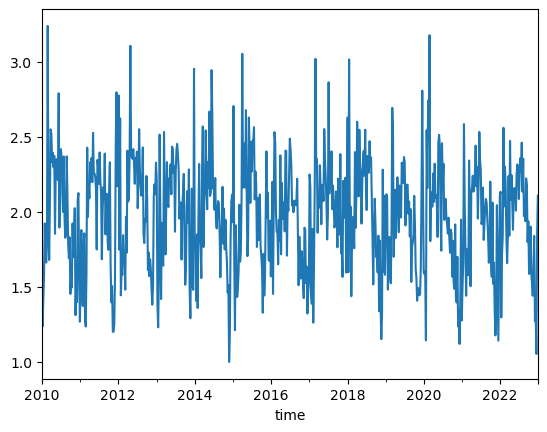

In [11]:
df[(df.index > '2010-1-1')]["Force"].groupby(pd.Grouper(freq='w')).mean().plot()
# df[(df.index > '2018-1-1')]["Direction"].groupby(pd.Grouper(freq='w')).mean().plot()

<AxesSubplot:xlabel='time'>

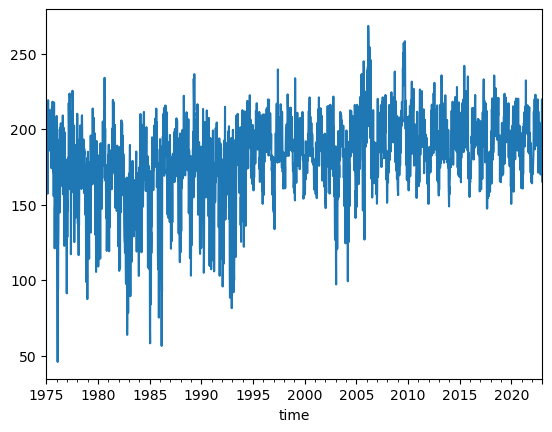

In [12]:
df["Direction"].groupby(pd.Grouper(freq='W')).mean().plot()

<AxesSubplot:xlabel='time'>

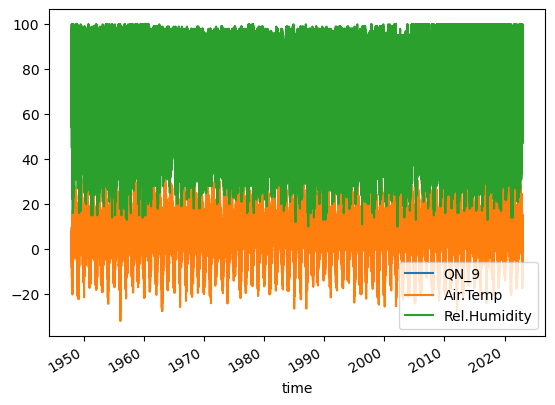

In [13]:
temp_df.plot()

<AxesSubplot:xlabel='time'>

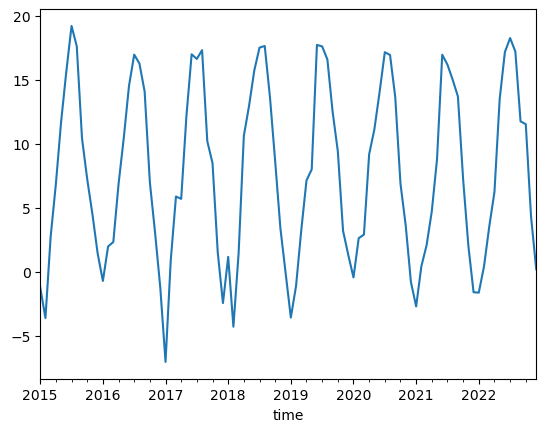

In [14]:
temp_df[(temp_df.index > '2015-1-1')]["Air.Temp"].groupby(pd.Grouper(freq='M')).mean().plot()
# df[(df.index > '2018-1-1')]["Direction"].groupby(pd.Grouper(freq='w')).mean().plot()

<AxesSubplot:xlabel='time'>

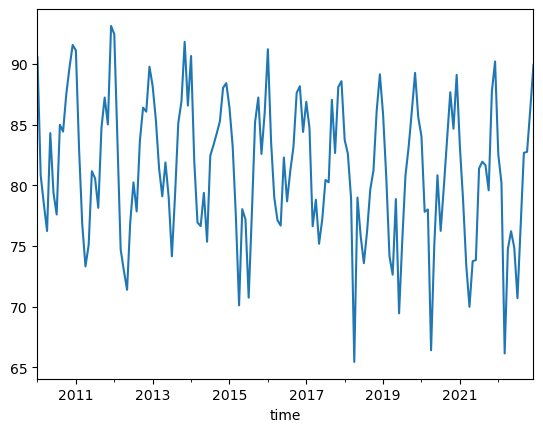

In [15]:
temp_df[(temp_df.index > '2010-1-1')]["Rel.Humidity"].groupby(pd.Grouper(freq='M')).mean().plot()


<AxesSubplot:xlabel='time'>

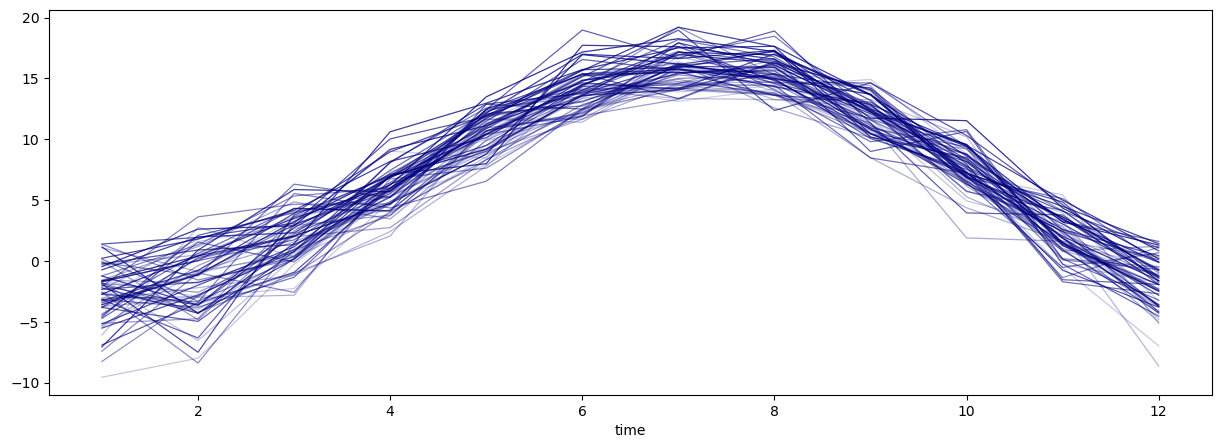

In [122]:
d2 = temp_df[(temp_df.index > '1960-1-1')].copy()
d2 = d2.groupby(pd.Grouper(freq='M')).mean()
idx = d2.index

num_lines = len(idx.year.unique())
start = 0.2
stop = 0.8
alpha_vals = np.linspace(start, stop, int((stop - start) / ((stop-start)/num_lines)))
rgba_colors = np.zeros((num_lines, 4))
# for red the first column needs to be one
rgba_colors[:, 2] = 0.5
# the fourth column needs to be your alphas
rgba_colors[:, 3] = alpha_vals

d2.index = [idx.month, idx.to_period('Y').rename('Year')]
d2["Air.Temp"].unstack().interpolate().plot(legend=False, color=rgba_colors, lw=0.9, figsize=(15,5))
#legend=False, 